# Fitting a line to data

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# From DFM's page, just to have an example
# http://dan.iel.fm/emcee/current/user/line/

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1+0.5*np.random.rand(N)
y = m_true*x+b_true
y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)

<Container object of 3 artists>

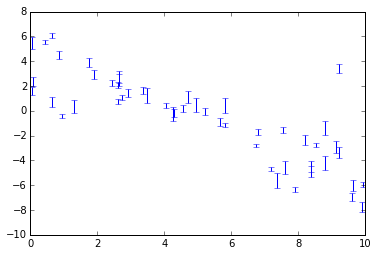

In [16]:
plt.errorbar(x,y,yerr,lw=0,elinewidth=1)

Whenever fitting - write down your assumptions, say how method is appropriate given your assumptions

y_n +/- sigma_n

Likelihood - Product[p(y_n | theta)] - this assumes:

* Independence - there are no possible calibration issues that can shift points up and down in correlated ways (i.e. half from one instrument and half from another)

* Gaussian errors - you observe a value and the distribution of possible true values is symmetric about that point and Gaussian (this is never true, though radio is closest)

* We are Correct about sigma_n^2 (and this is never true either) (To break this, introduce uncertainties as parameters

* No uncertainty on x_n - it's all on the y_n

* No intrinsic width to the distribution, and no outliers (To break this, introduce an additional parameter)

p(y_n | theta) = N(y_n | y_n (true), sigma_n^2) where N = Normal/Gaussian distribution

log(likelihood) = Sum[-1/2 (y_n - y_n(true))^2 / sigma_n^2]

y_n(true) = mx + b 

theta = {m, b}

The likelihood is quadratic in the parameters and in the data

Want to find the maximum, so take the derivative, then it's linear in the parameters and the data - linear algebra to the rescue!

$-(1/2)[y-A*\theta]^T C^{-1} [y-A*\theta]$

A is the design matrix - 2 columns, left are the Xs, right are just 1s

C^-1 is the error matrix - 1/sigma_i^2 on the diagonal with zeros everywhere else. Do not make this on the computer (taking up storage with the zeros)

take the derivative wrt $\theta$ ??? I'll add the picture of the board with the scalar analogy Hogg used to calculate the derivative

$\theta_{best} = [A^T C^{-1} A]^{-1} [A^T C{-1} y]$

the first matrix will turn into a 2x2 matrix - covariance matrix. Note that the uncertainties/covariance are only set by the covariance and design matrices - only x_n and sigma_n. The data's not involved!

the second matrix will turn into a 1 column 2 row matrix

To plot the line corresponding to the range of best fits - construct a 2D gaussian corresponding to the "best fit" with axes/rotation defined by the covariance matrix, make 100 draws at random and plot them